In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor  

In [4]:
data = pd.read_csv('CCPP_data (1).csv')
X = data[['AT', 'AP', 'RH', 'V']]
y = data['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
print(rf) 

RandomForestRegressor(random_state=42)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [14]:
print(f"Number of training set samples：{X_train.shape[0]}")
print(f"Number of test set samples：{X_test.shape[0]}")

Number of training set samples：7654
Number of test set samples：1914


In [16]:
cv=5
scoring = 'neg_mean_squared_error'

In [18]:
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor(max_depth=3, random_state=42)
model_rf = RandomForestRegressor(random_state=42)

In [20]:
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_dt = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [22]:
print("Linear Regression Avg MSE:", -scores_lr.mean().round(2))
print("Decision Tree Avg MSE:", -scores_dt.mean().round(2))
print("RandomForest Avg MSE:", -scores_rf.mean().round(3))

Linear Regression Avg MSE: 20.92
Decision Tree Avg MSE: 26.88
RandomForest Avg MSE: 12.001


In [24]:
mse_lr = float(-scores_lr.mean())
mse_dt = float(-scores_dt.mean())
mse_rf = float(-scores_rf.mean())

In [26]:
mse_dict = {
    'LinearRegression': mse_lr,
    'DecisionTree': mse_dt,
    'RandomForest': mse_rf
}

In [28]:
models = [
    ('Linear Regression', model_lr, mse_lr),
    ('Decision Tree', model_dt, mse_dt),
    ('Random Forest', model_rf, mse_rf)
]

In [30]:
best_model_info = min(models, key=lambda x: x[2])

In [32]:
print(f"\n=== Model selection results ===")
print(f"best model: {best_model_info[0]}")
print(f"Validation set averageMSE: {best_model_info[2]:.3f}")


=== Model selection results ===
best model: Random Forest
Validation set averageMSE: 12.001


In [36]:
best_model = RandomForestRegressor(
    n_estimators=100,  
    max_depth=None,     
    random_state=42    
)

In [38]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

In [40]:
best_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
y_pred = best_model.predict(X_test)

In [44]:
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

In [46]:
print(f"Test Set MSE: {test_mse:.3f}")
print(f"Test Set RMSE: {test_rmse:.3f} MW")

Test Set MSE: 10.494
Test Set RMSE: 3.239 MW


In [48]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

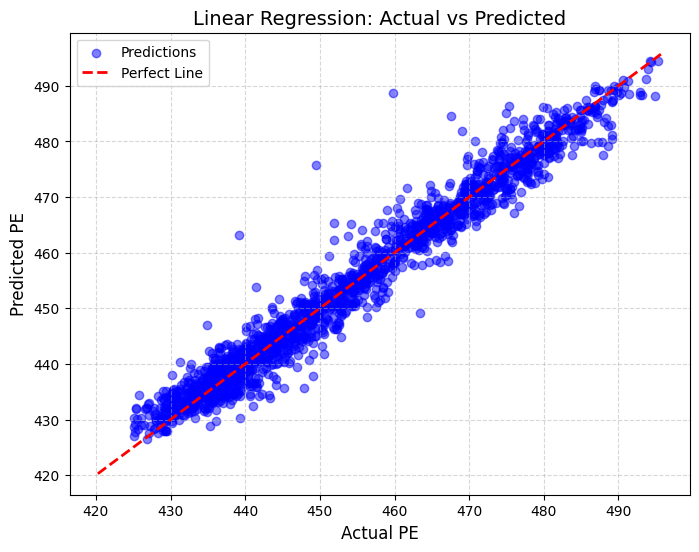

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Line')
plt.xlabel('Actual PE', fontsize=12)
plt.ylabel('Predicted PE', fontsize=12)
plt.title('Linear Regression: Actual vs Predicted', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [68]:
residuals = y_test - y_pred

In [74]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [76]:
import seaborn as sns

In [78]:
print(sns.__version__)

0.13.2


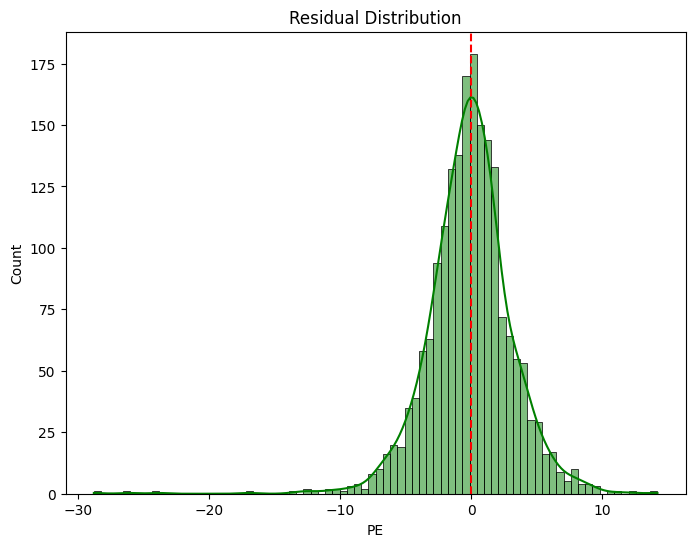

In [80]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green')
plt.axvline(0, color='red', linestyle='--')
plt.title('Residual Distribution')
plt.show()

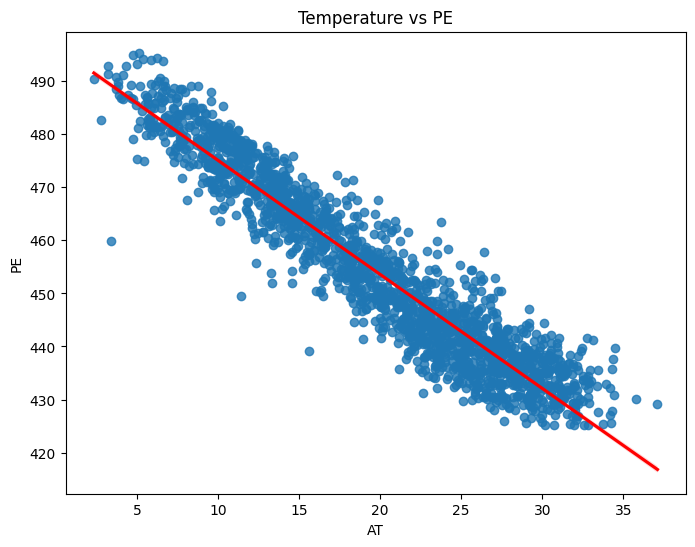

In [82]:
plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['AT'], y=y_test, line_kws={'color':'red'})
plt.title('Temperature vs PE')
plt.show()

In [86]:
model_lr.fit(X_train, y_train) 

LinearRegression()

In [88]:
coef = pd.DataFrame({
    'Feature': X.columns,         
    'Coefficient': model_lr.coef_  
})

In [90]:
print(coef)

  Feature  Coefficient
0      AT    -1.985900
1      AP     0.062200
2      RH    -0.158118
3       V    -0.232094


/var/folders/4g/7tr4rl0s6p78hvt1s_5rmxs00000gn/T/ipykernel_22080/3274615332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef, palette='viridis')


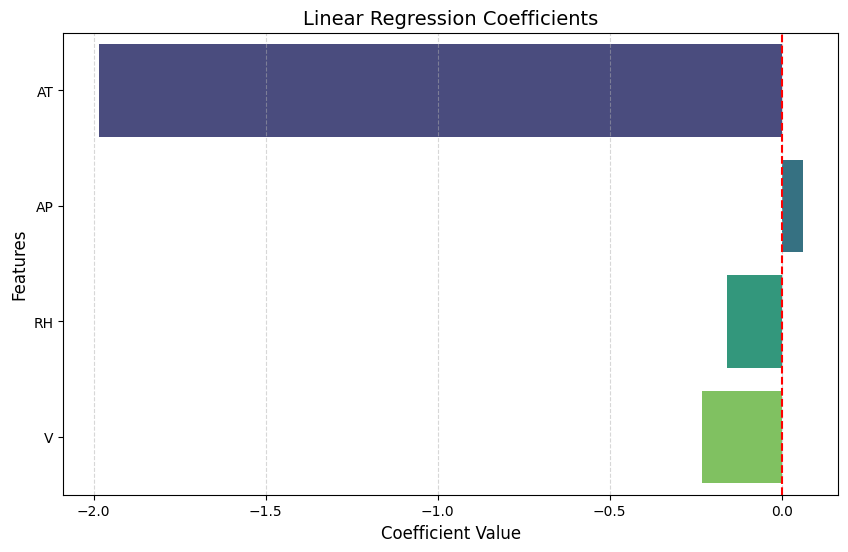

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef, palette='viridis')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Linear Regression Coefficients', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

In [94]:
from statsmodels.graphics.regressionplots import plot_partregress_grid

In [96]:
import statsmodels.api as sm

In [102]:
X_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_sm).fit()

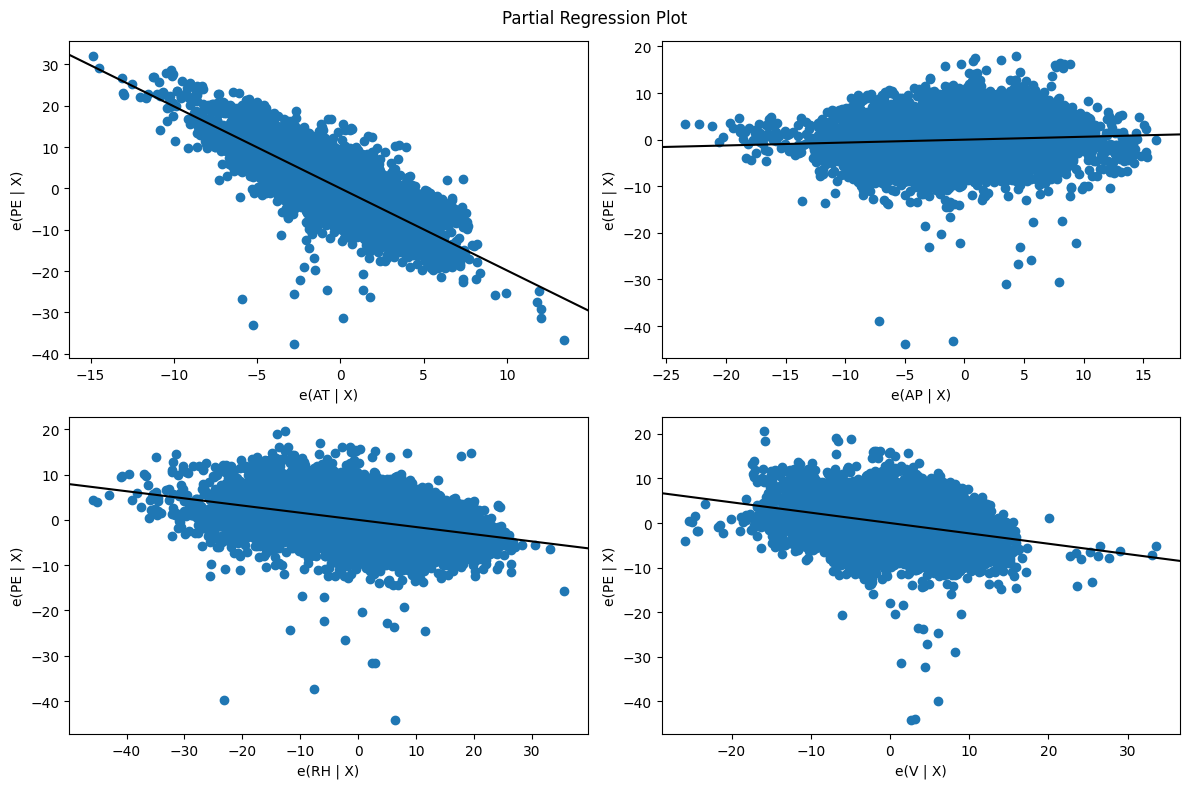

In [108]:
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model_sm, fig=fig, exog_idx=['AT', 'AP', 'RH', 'V'])  
plt.tight_layout()
plt.show()